In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
data = np.load("ORL_faces.npz")
x_train = data["trainX"]
x_test = data["testX"]
y_train = data["trainY"]
y_test = data["testY"]

In [3]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Convert labels to categorical format
num_classes = 40
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Reshape the input data
x_train = x_train.reshape(-1, 112, 92, 1)
x_test = x_test.reshape(-1, 112, 92, 1)

In [6]:
# Show the train and test Data shape
print(x_train.shape)
print(y_train.shape)

(240, 112, 92, 1)
(240, 40)


In [7]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(112, 92, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(40, activation="softmax"))

In [8]:
# Train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
8/8 [==============================] - 1s 72ms/step - loss: 3.3698 - accuracy: 0.0625 - val_loss: 3.0669 - val_accuracy: 0.0875
Epoch 2/15
8/8 [==============================] - 1s 64ms/step - loss: 2.8800 - accuracy: 0.1458 - val_loss: 2.6794 - val_accuracy: 0.1312
Epoch 3/15
8/8 [==============================] - 1s 64ms/step - loss: 2.4520 - accuracy: 0.3000 - val_loss: 2.2601 - val_accuracy: 0.5063
Epoch 4/15
8/8 [==============================] - 1s 64ms/step - loss: 1.8086 - accuracy: 0.6500 - val_loss: 1.5713 - val_accuracy: 0.6125
Epoch 5/15
8/8 [==============================] - 1s 70ms/step - loss: 1.0572 - accuracy: 0.7875 - val_loss: 1.3533 - val_accuracy: 0.6938
Epoch 6/15
8/8 [==============================] - 1s 64ms/step - loss: 0.6945 - accuracy: 0.8292 - val_loss: 0.7869 - val_accuracy: 0.7875
Epoch 7/15
8/8 [==============================] - 1s 64ms/step - loss: 0.4215 - accuracy: 0.9333 - val_loss: 0.5299 - val_accuracy: 0.9187
Epoch 8/15
8/8 [===========

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2590331435203552
Test accuracy: 0.949999988079071


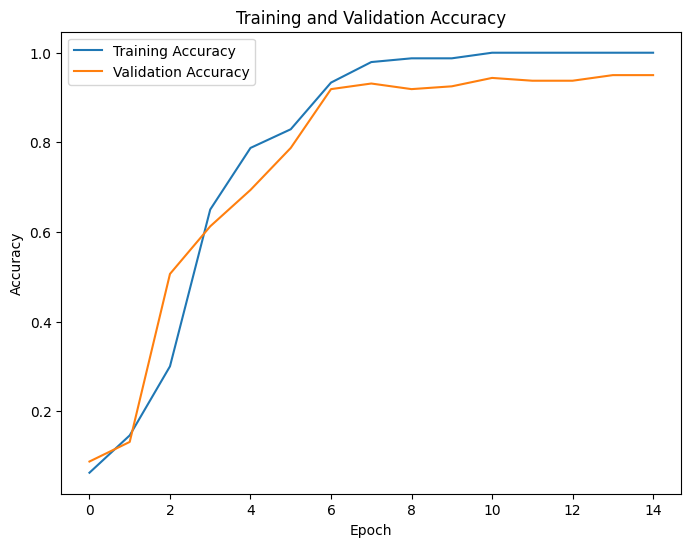

In [10]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

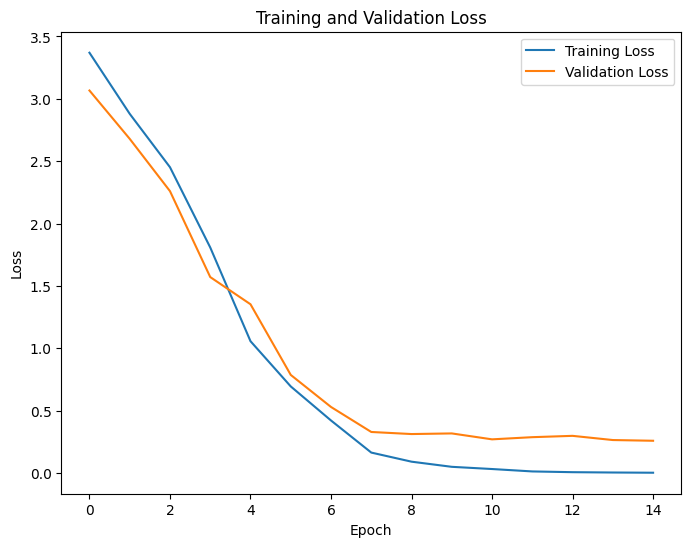

In [11]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

5/5 [==============================] - 0s 15ms/step


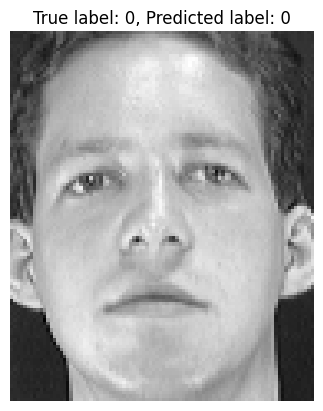

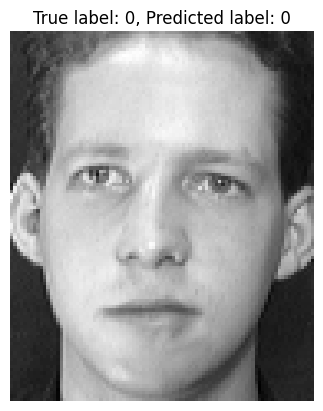

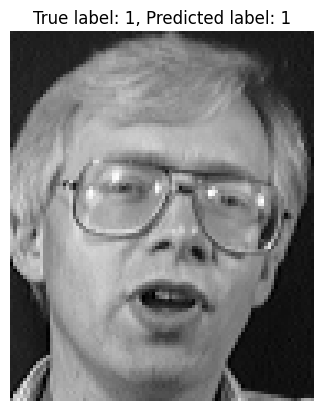

In [13]:
# Show the predictions
for i in range(0,15,5):
    image = x_test[i].reshape(112, 92)
    true_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
    plt.axis('off')
    plt.show()